### Author:---> Abhishek Kumar
### Project:--> Daily Road Accident Survival Prediction & Analysis Project

![alt text](image-auto-accident-involving-two-cars-1.jpg)

![alt text](<1604.m00.i125.n038.S.c12.327750833 Car crash. Road accident isometrics vector illustration-1.jpg>)

![alt text](cf419209-6aee-499b-a88c-2d8209b07aad-2.jpg)

#### Step1:---> Import All the Important Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier # type: ignore
from lightgbm import LGBMClassifier # type: ignore
from catboost import CatBoostClassifier # type: ignore
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import joblib

In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


#### Step2:---> Now Load the Accident Dataset

In [8]:
df = pd.read_csv("accident.csv")

#### Step3:--->Read the Top 5 Rows of Accident Dataset

In [16]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


#### Step4:---> Read the last 5 Rows of Accident Dataset

In [17]:
df.tail()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1
199,56,Female,43.0,No,Yes,1


#### Step5:---> Check the total info of the Accident Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [12]:
df.info

<bound method DataFrame.info of      Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0     56  Female             27.0          No            No         1
1     69  Female             46.0          No           Yes         1
2     46    Male             46.0         Yes           Yes         0
3     32    Male            117.0          No           Yes         0
4     60  Female             40.0         Yes           Yes         0
..   ...     ...              ...         ...           ...       ...
195   69  Female            111.0          No           Yes         1
196   30  Female             51.0          No           Yes         1
197   58    Male            110.0          No           Yes         1
198   20    Male            103.0          No           Yes         1
199   56  Female             43.0          No           Yes         1

[200 rows x 6 columns]>

#### Step6:---> Perform Statistic Analysis of Accident Dataset

In [13]:
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


In [14]:
df.describe

<bound method NDFrame.describe of      Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0     56  Female             27.0          No            No         1
1     69  Female             46.0          No           Yes         1
2     46    Male             46.0         Yes           Yes         0
3     32    Male            117.0          No           Yes         0
4     60  Female             40.0         Yes           Yes         0
..   ...     ...              ...         ...           ...       ...
195   69  Female            111.0          No           Yes         1
196   30  Female             51.0          No           Yes         1
197   58    Male            110.0          No           Yes         1
198   20    Male            103.0          No           Yes         1
199   56  Female             43.0          No           Yes         1

[200 rows x 6 columns]>

#### Step7:---> check the total column info of the Accident Dataset

In [15]:
df.columns

Index(['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Survived'],
      dtype='object')

In [27]:
df.size

1200

In [5]:
df.shape

(200, 6)

In [28]:
mode_gender = df['Gender'].mode()[0]  # Find the mode
df['Gender'] = df['Gender'].fillna(mode_gender)

In [29]:
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median())

In [30]:
df.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

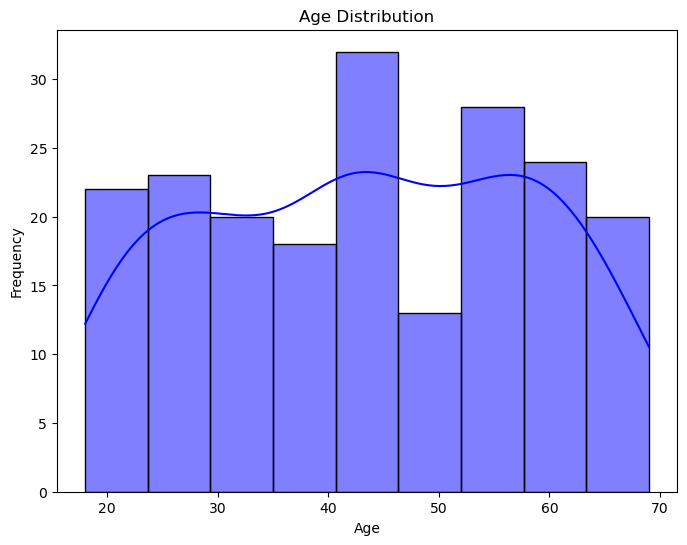

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


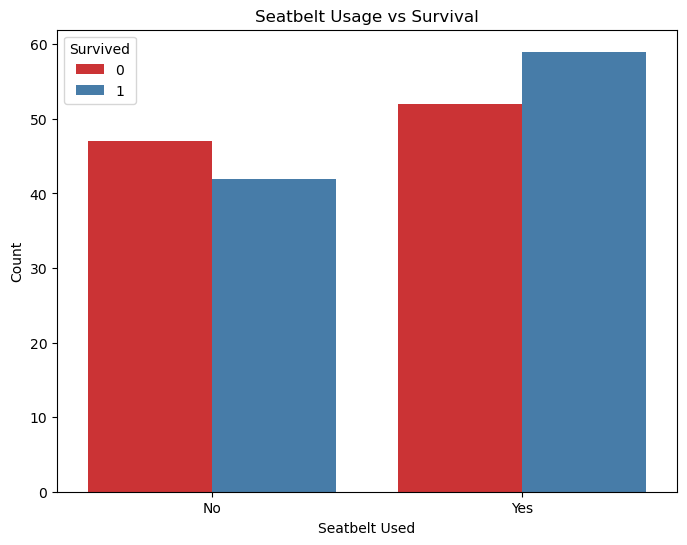

In [32]:
# 8. Countplot to see the impact of 'Seatbelt_Used' on survival
plt.figure(figsize=(8,6))
sns.countplot(x='Seatbelt_Used', hue='Survived', data=df, palette='Set1')
plt.title('Seatbelt Usage vs Survival')
plt.xlabel('Seatbelt Used')
plt.ylabel('Count')
plt.show()

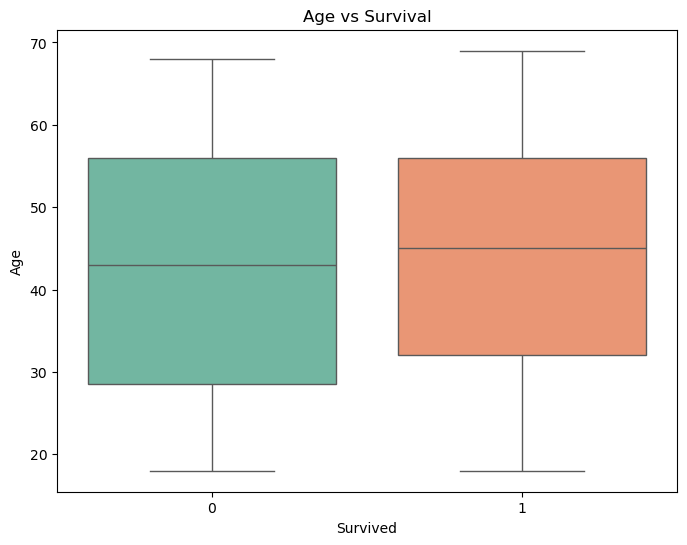

In [33]:
# 9. Boxplot for 'Age' vs 'Survived' to see the impact of age on survival
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


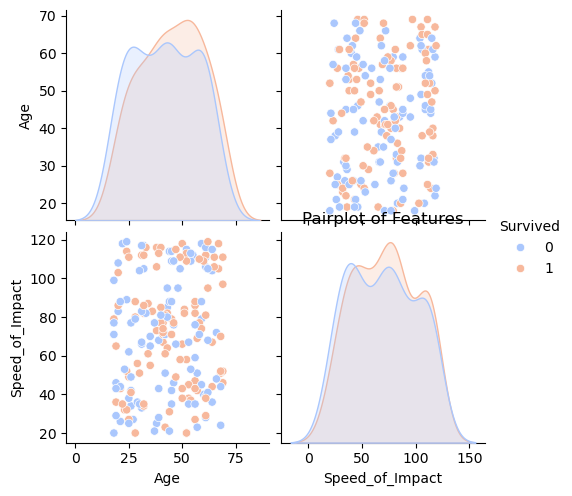

In [34]:
# 10. Pairplot to visualize relationships between multiple features
sns.pairplot(df, hue='Survived', palette='coolwarm')
plt.title('Pairplot of Features')
plt.show()

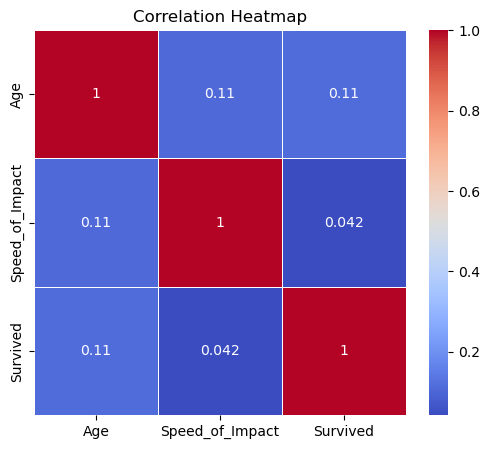

In [35]:
# 11. Heatmap to visualize correlations between numerical features
correlation_matrix = df[['Age', 'Speed_of_Impact', 'Survived']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


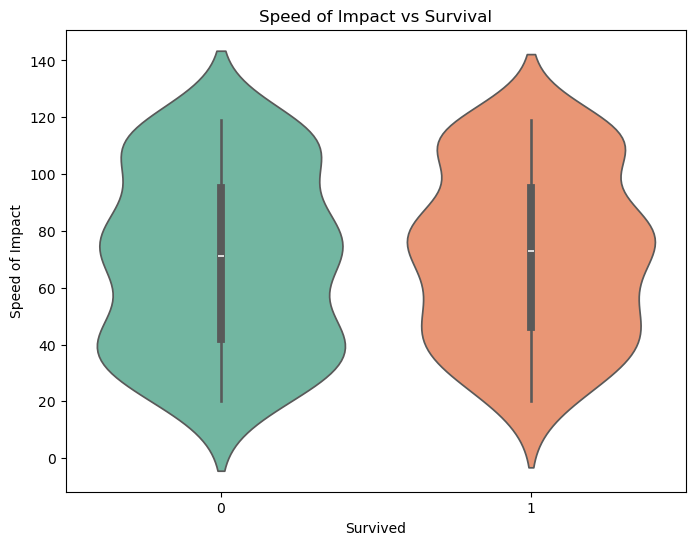

In [36]:
# 12. Violin plot for 'Speed_of_Impact' vs 'Survived'
plt.figure(figsize=(8,6))
sns.violinplot(x='Survived', y='Speed_of_Impact', data=df, palette='Set2')
plt.title('Speed of Impact vs Survival')
plt.xlabel('Survived')
plt.ylabel('Speed of Impact')
plt.show()

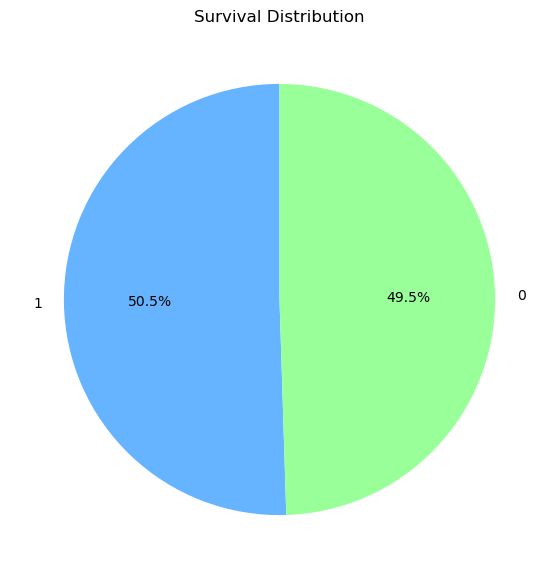

In [37]:
# 13. Pie chart for the distribution of 'Survived'
plt.figure(figsize=(7,7))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Survival Distribution')
plt.ylabel('')
plt.show()

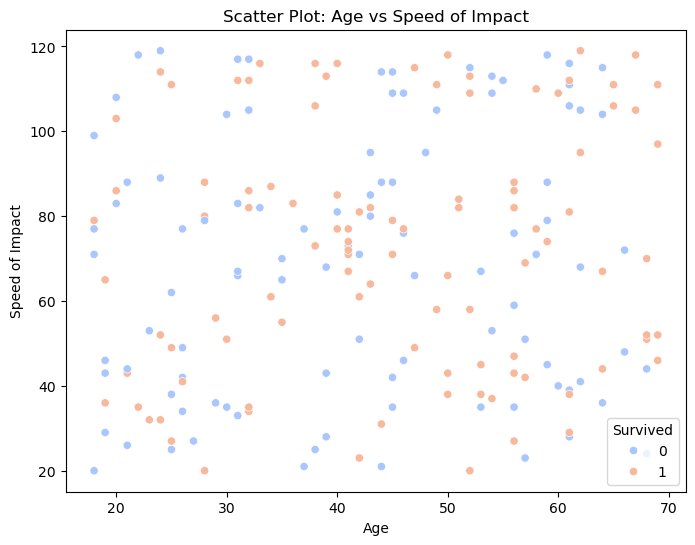

In [38]:
# 1. Scatter Plot: Age vs Speed_of_Impact
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Speed_of_Impact', data=df, hue='Survived', palette='coolwarm')
plt.title('Scatter Plot: Age vs Speed of Impact')
plt.xlabel('Age')
plt.ylabel('Speed of Impact')
plt.show()

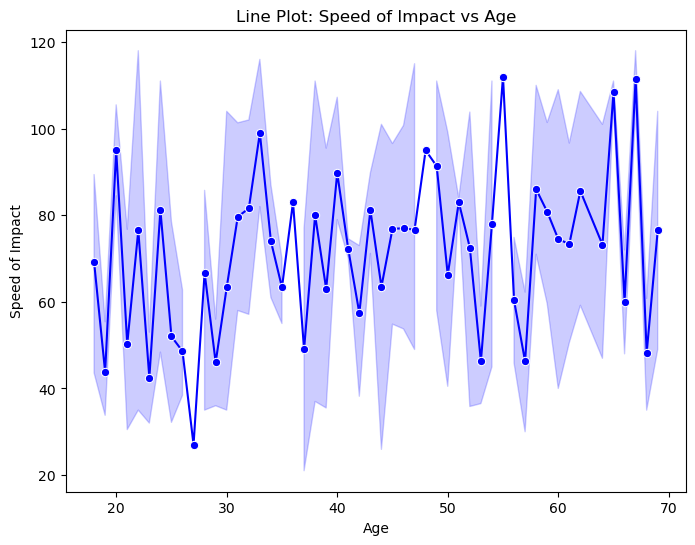

In [39]:
# 2. Line Plot: Speed_of_Impact vs Age (Ordered)
plt.figure(figsize=(8,6))
sns.lineplot(x='Age', y='Speed_of_Impact', data=df, marker='o', color='blue')
plt.title('Line Plot: Speed of Impact vs Age')
plt.xlabel('Age')
plt.ylabel('Speed of Impact')
plt.show()

In [40]:
# Step 4: Encode categorical variables
label_encoders = {}
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [41]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [42]:
scaler = MinMaxScaler()
df[['Age', 'Speed_of_Impact', 'Gender', 'Helmet_Used', 'Seatbelt_Used']] = scaler.fit_transform(
    df[['Age', 'Speed_of_Impact', 'Gender', 'Helmet_Used', 'Seatbelt_Used']]
)

In [43]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [44]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [46]:
# Step 8: Train 10 Different Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}


In [47]:
# Step 9-11: Train and Evaluate Models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    results.append((name, accuracy, roc_auc))

[LightGBM] [Info] Number of positive: 83, number of negative: 77
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518750 -> initscore=0.075035
[LightGBM] [Info] Start training from score 0.075035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

  File "c:\Users\ADMIN\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ADMIN\AppData\Local\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [48]:
# Step 12: Compare Model Performance
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
print(results_df.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy   ROC AUC
3  K-Nearest Neighbors     0.600  0.497475
2        Random Forest     0.550  0.497475
6    Gradient Boosting     0.550  0.469697
0  Logistic Regression     0.525  0.525253
9             LightGBM     0.525  0.463384
8              XGBoost     0.500  0.472222
1        Decision Tree     0.475  0.482323
5          Naive Bayes     0.475  0.502525
4                  SVM     0.450  0.373737
7             AdaBoost     0.425  0.458333


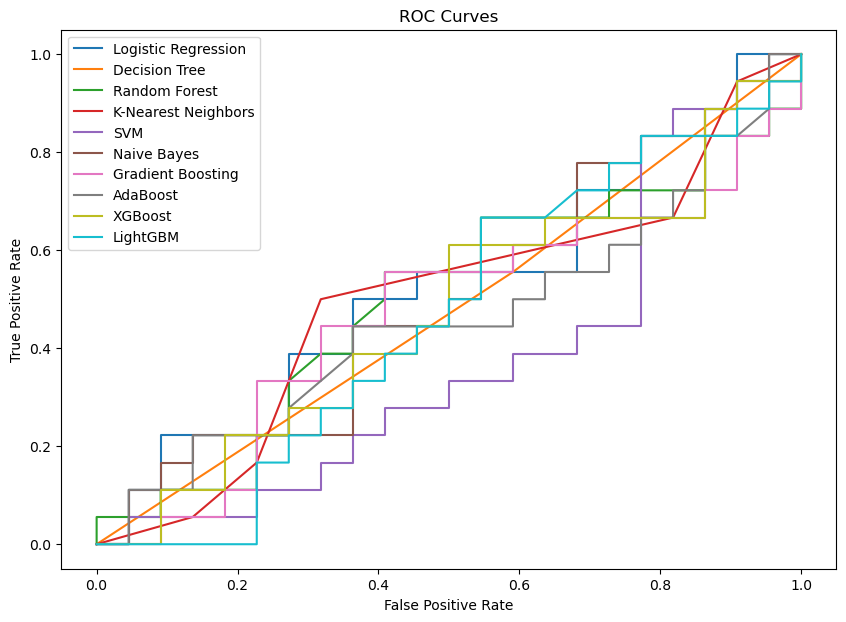

In [49]:
# Step 13: Plot ROC Curves
plt.figure(figsize=(10, 7))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [51]:
# Step 14: Save Best Model
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
joblib.dump(best_model, "best_classification_model.pkl")

['best_classification_model.pkl']

In [52]:
# Step 16: Feature Importance Analysis (For Tree-Based Models)
if hasattr(best_model, "feature_importances_"):
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importance.sort_values().plot(kind="barh", title="Feature Importance")
    plt.show()